In [26]:
!pip install -q -q -q geopandas
!pip install -q -q -q btbpy
!pip install -q -q -q descartes
!pip install -q -q -q mapclassify

In [19]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from sklearn.neighbors import KDTree
import numpy as np
import btbpy

In [5]:
df = pd.read_csv('Filosofi2015_french_grid.zip', compression='zip')

In [6]:
df.head(3)

,x,y,Men,Men_pauv
0,3763200,2893400,990.0,280.0
1,3762200,2890000,926.0,128.0
2,3762400,2893400,508.0,131.0


In [9]:
radius=np.array([400,800, 1600,3200])

In [16]:
neighbors=np.zeros((df.shape[0],radius.size),dtype=np.float)
tree = KDTree(df[['x', 'y']])
for i in range(radius.size):
    neighbors[:,i]=tree.query_radius(df[['x', 'y']],r= radius[i],count_only=True,return_distance=False)
    output=np.column_stack([df[['x', 'y']],neighbors])
    names=np.hstack([['x','y'], np.core.defchararray.add('r_',np.char.mod('%d', radius))])
    output=pd.DataFrame(output,columns=names)

In [29]:
scale_function = btbpy.kernelSmoothing(output, '3035', 2000, 15000, verbose=False)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
scale_function['D'] = np.log(scale_function.r_3200) - np.log(scale_function.r_1600) 

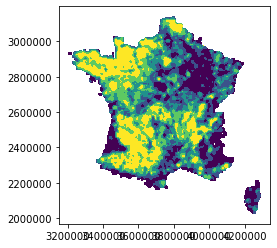

In [31]:
scale_function.plot('D', scheme = 'quantiles')